<a href="https://colab.research.google.com/github/Pranjalits/Machine_Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

IMPORTING DATASET FROM KAGGLE

{Pima Indians Diabetes Database}

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = 'chmod 600 /content'

In [4]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 20.1MB/s]


In [5]:
!unzip \*.zip && rm*.zip

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            
/bin/bash: line 1: rm*.zip: command not found


In [6]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


THERE ARE ZEROS---> NEED TO BE HANDLED IN MEDICAL FEILD

In [9]:
df.shape

(768, 9)

In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

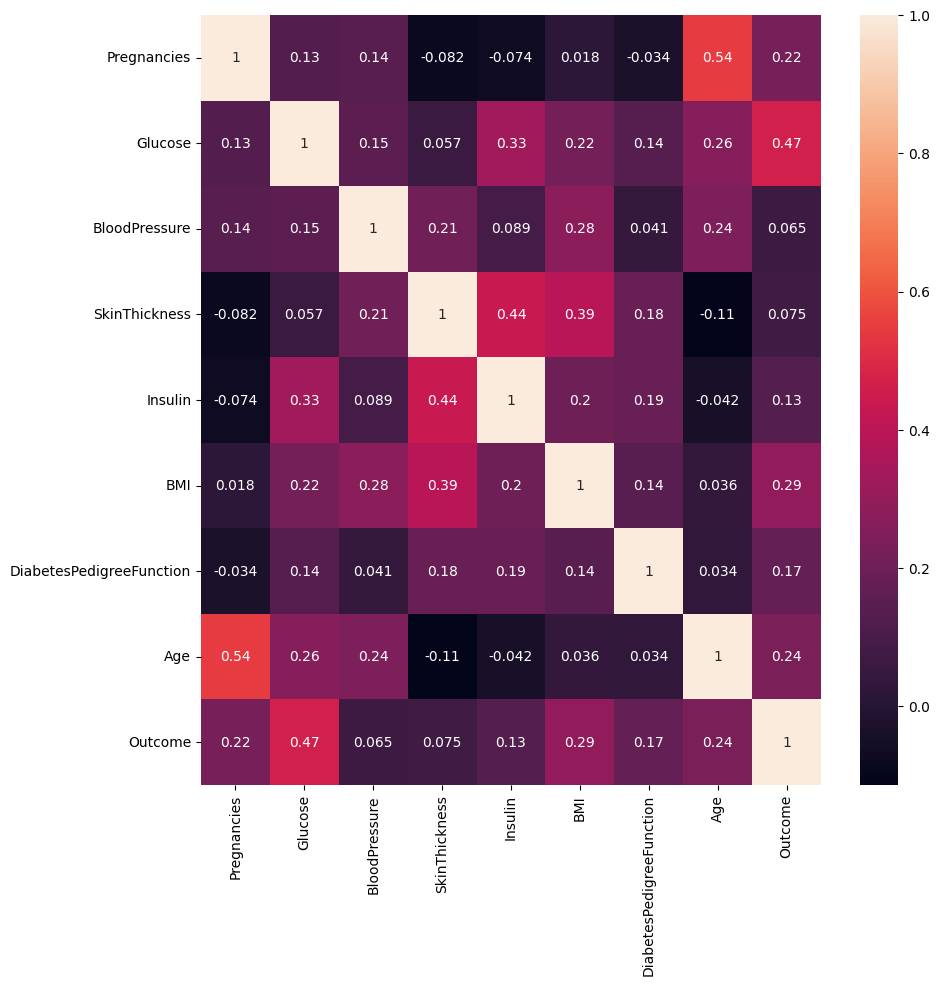

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)
plt.show

DESCRIPTIVE STATS OF DATA

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


IF NORMAL DISTRIBUTION -> MEAN
ELSE MEDIAN AMPUTATION

<ipython-input-13-bb4494b983d6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Glucose)


<Axes: xlabel='Glucose', ylabel='Density'>

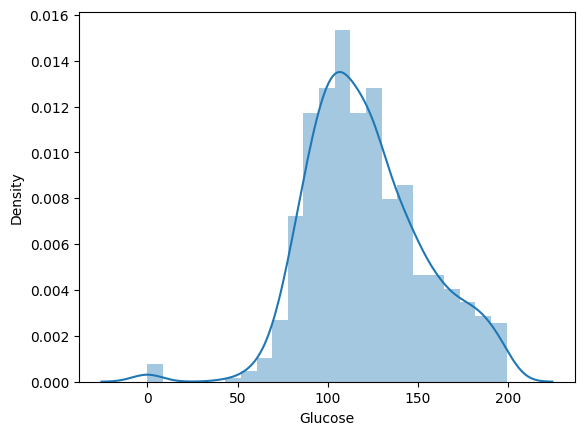

In [13]:
sns.distplot(df.Glucose)

In [14]:
df["Glucose"] = df["Glucose"].replace(0,df["Glucose"].mean())

<ipython-input-15-bb4494b983d6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Glucose)


<Axes: xlabel='Glucose', ylabel='Density'>

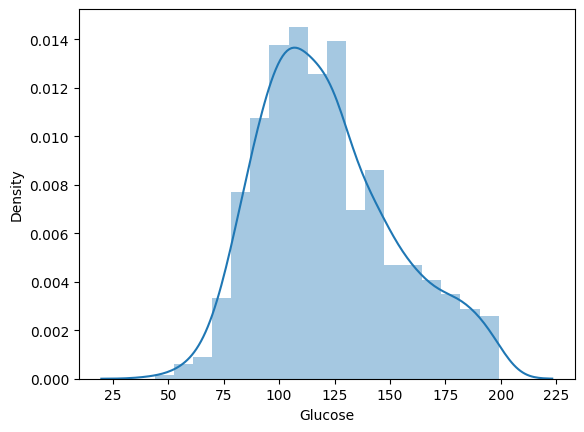

In [15]:
sns.distplot(df.Glucose)

<ipython-input-16-5183c8f00260>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Pregnancies)


<Axes: xlabel='Pregnancies', ylabel='Density'>

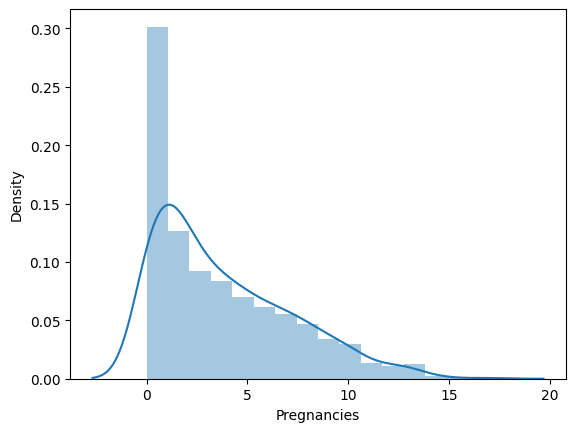

In [16]:
sns.distplot(df.Pregnancies)

In [17]:
df["Pregnancies"] = df["Pregnancies"].replace(0,df["Pregnancies"].median())

<ipython-input-18-d32cc533e08e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.BloodPressure) #BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome


<Axes: xlabel='BloodPressure', ylabel='Density'>

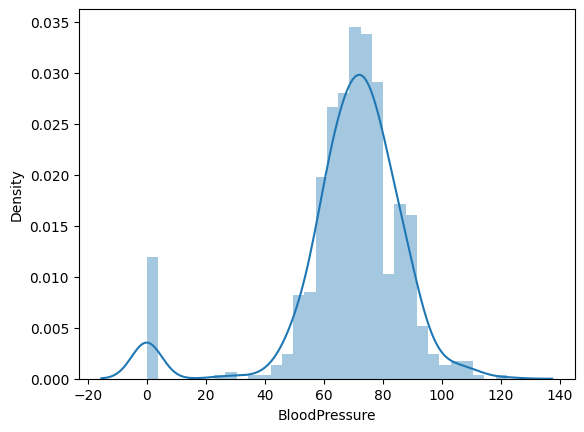

In [18]:
sns.distplot(df.BloodPressure) #BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome

In [19]:
df["BloodPressure"] = df["BloodPressure"].replace(0,df["BloodPressure"].median())

<ipython-input-20-d4621c29f1f7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SkinThickness)


<Axes: xlabel='SkinThickness', ylabel='Density'>

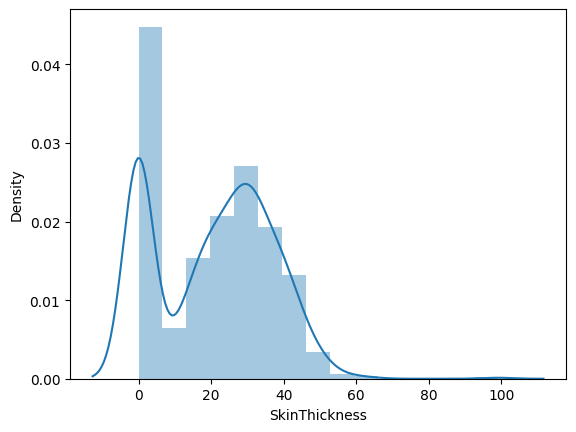

In [20]:
sns.distplot(df.SkinThickness)

In [21]:
df["SkinThickness"] = df["SkinThickness"].replace(0,df["SkinThickness"].median())

<ipython-input-22-332b7890e081>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Insulin)


<Axes: xlabel='Insulin', ylabel='Density'>

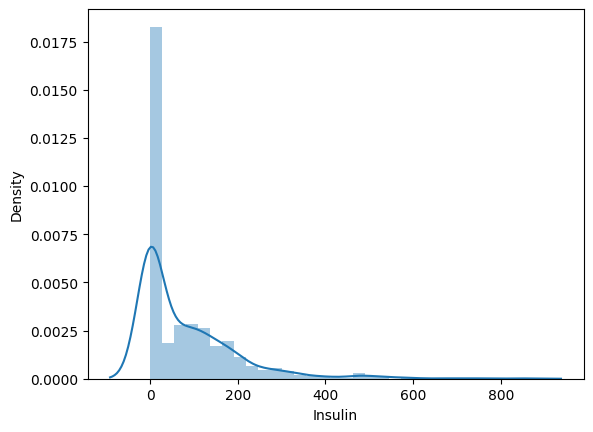

In [22]:
sns.distplot(df.Insulin)

In [23]:
df["Insulin"] = df["Insulin"].replace(0,df["Insulin"].median())

<ipython-input-24-8e68ae17a522>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.BMI)


<Axes: xlabel='BMI', ylabel='Density'>

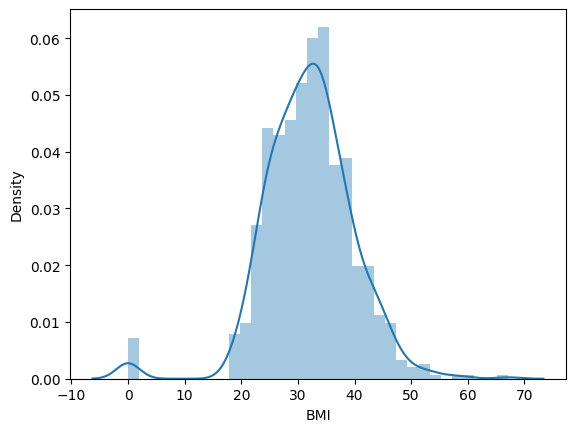

In [24]:
sns.distplot(df.BMI)

In [25]:
df["BMI"] = df["BMI"].replace(0,df["BMI"].median())

<ipython-input-26-b78de152e552>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Outcome)


<Axes: xlabel='Outcome', ylabel='Density'>

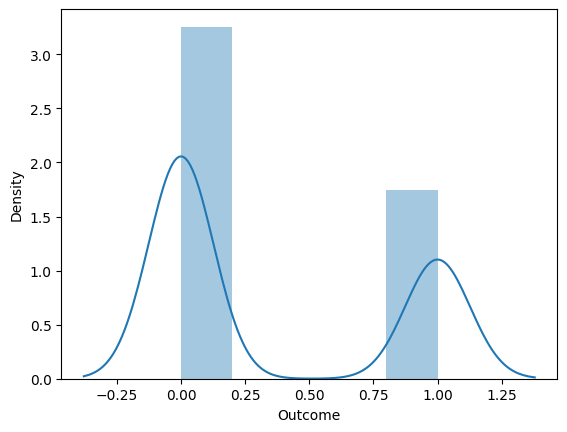

In [26]:
sns.distplot(df.Outcome)

<ipython-input-27-b2378c9d8a20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

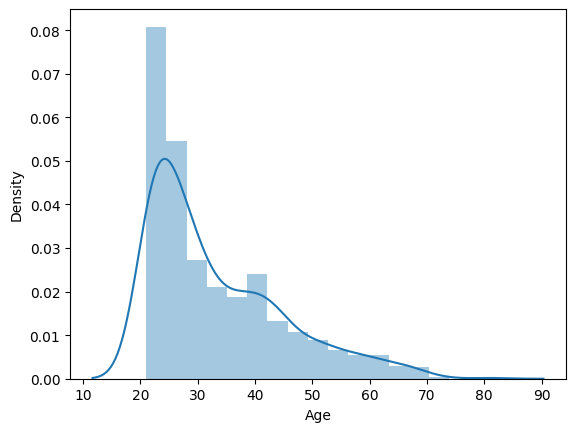

In [27]:
sns.distplot(df.Age)

In [28]:
df["Age"] = df["Age"].replace(0,df["Age"].median())

<ipython-input-29-508baf36864a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.DiabetesPedigreeFunction)


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

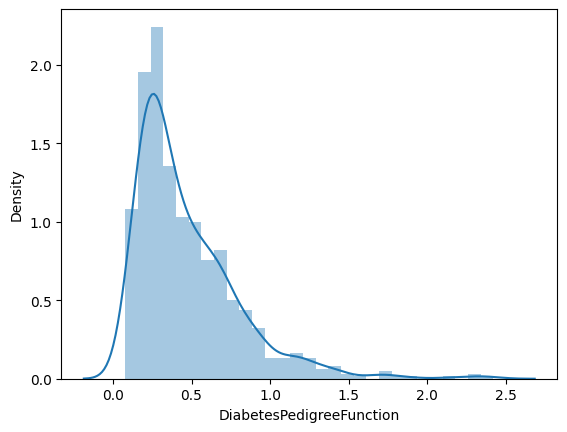

In [29]:
sns.distplot(df.DiabetesPedigreeFunction)

In [30]:
df["DiabetesPedigreeFunction"] = df["DiabetesPedigreeFunction"].replace(0,df["DiabetesPedigreeFunction"].median())

orient="h": This parameter sets the orientation of the box plot. "h" means horizontal, so the boxes will be drawn horizontally.
palette="Set2": This specifies the color palette to use for the box plot. "Set2" is one of the predefined color palettes in Seaborn, which typically offers soft, pleasant colors.
ax=ax: This tells Seaborn to plot the box plot on the specific ax object. It links the Seaborn plot with the Matplotlib subplot.
plt.subplots : return 2 objects --> fig = paper; ax = comic strip boxes

<Axes: >

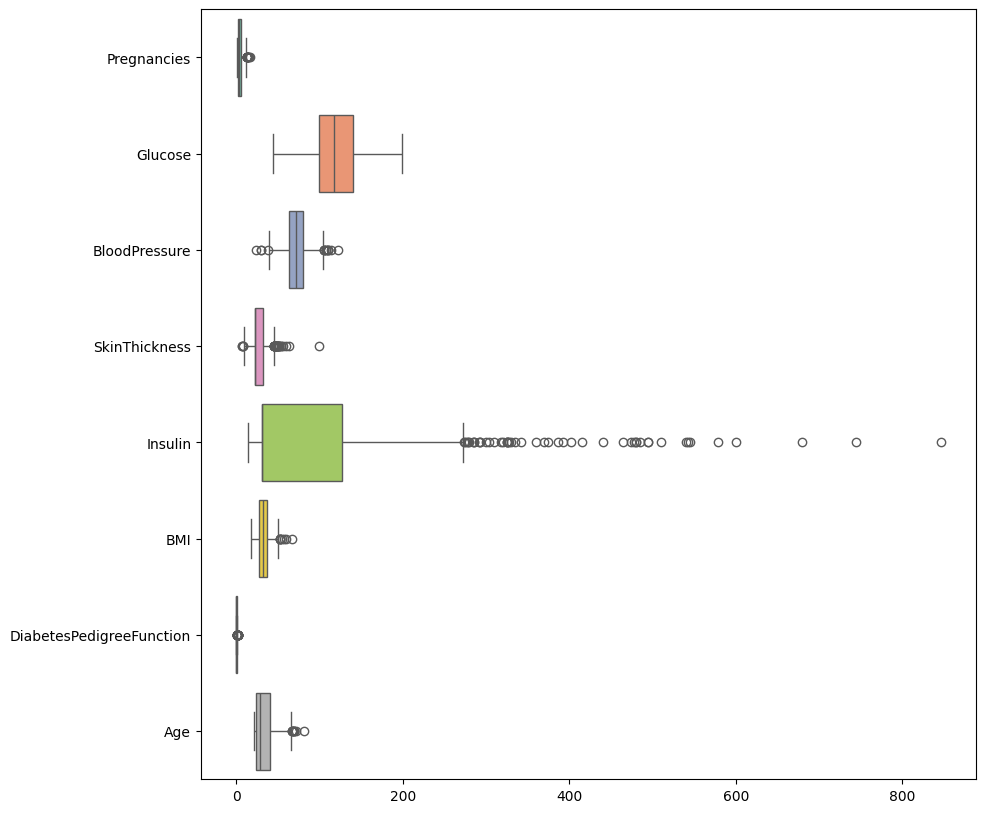

In [31]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=X, orient="h", palette="Set2", ax=ax)

In [32]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [33]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [34]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
  Q1 = X[col].quantile(0.25)
  Q3 = X[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  mask = X[col].between(lower_limit,upper_limit)
  X_outlier_detection = X[mask]
  y_outlier_detection = y[mask]



In [35]:
X_outlier_detection.shape

(759, 8)

points are removed but not much

<Axes: >

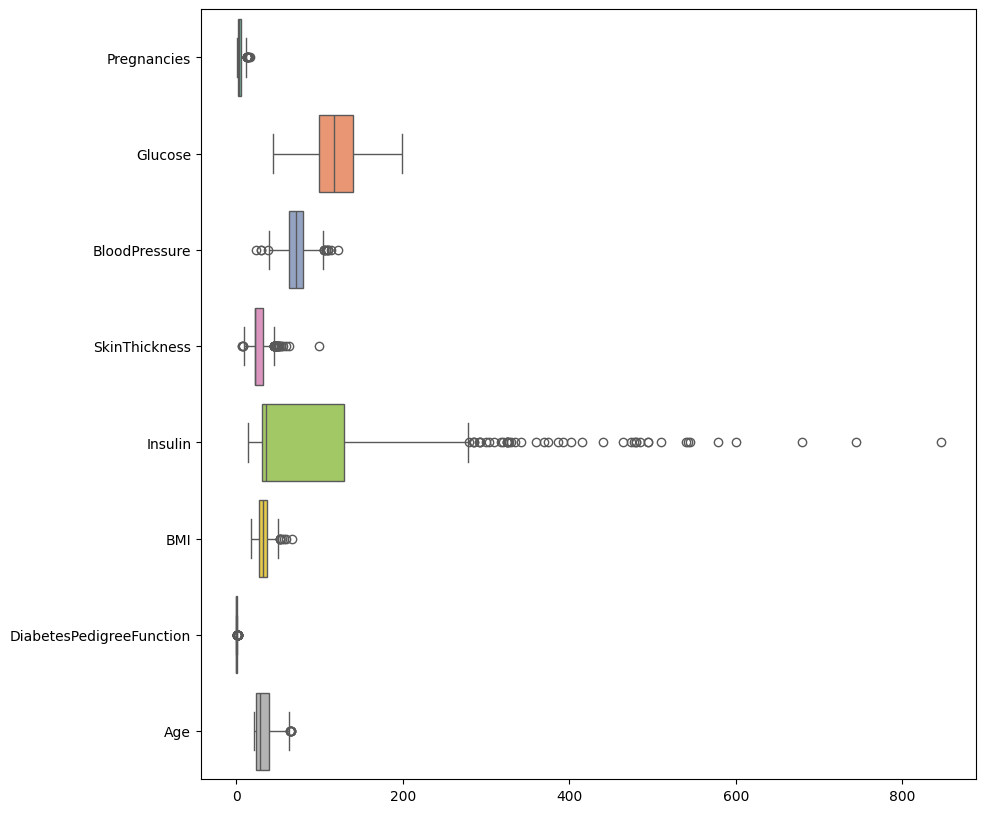

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=X_outlier_detection, orient="h", palette="Set2", ax=ax)

STANDARDIZATION ---> IF ONE FEATURE HAS MORE RANGE COMPARED TO ANOTHER --->MODEL INTERNALLY PRIORITISES IT

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_outlier_detection)

<Axes: >

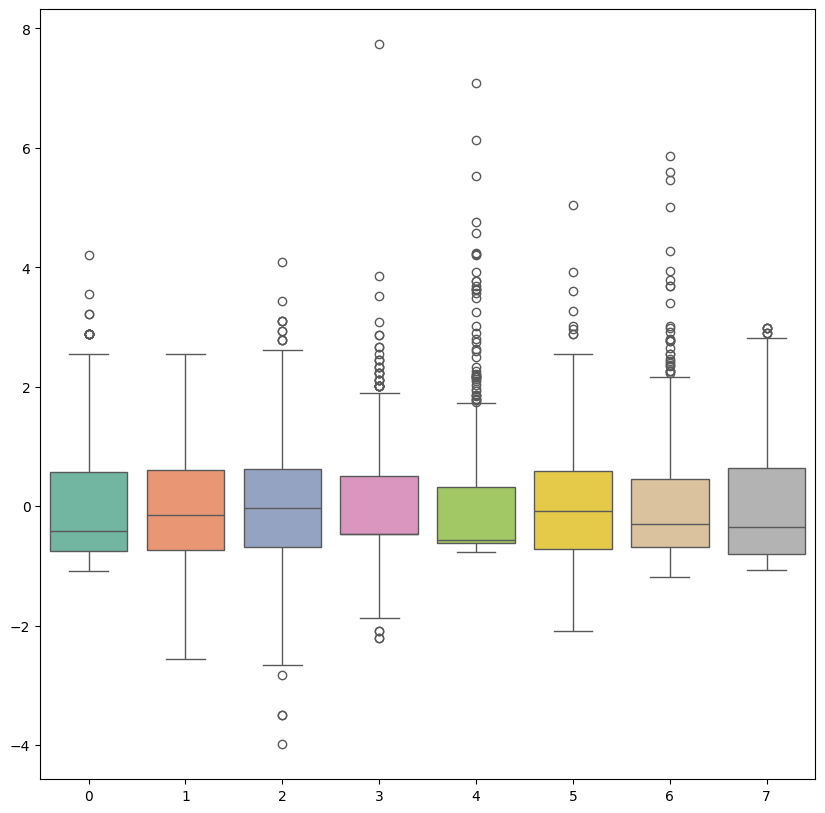

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=X_scaled, palette="Set2", ax=ax)

In [39]:
X_scaled = pd.DataFrame(X_scaled,columns=X_outlier_detection.columns)
X_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.029772e-16,-3.978665e-17,-2.691450e-17,-1.509552e-16,-4.329724e-17,-2.410603e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.558042e+00,-3.985285e+00,-2.200901e+00,-7.684941e-01,-2.081055e+00,-1.183313e+00,-1.062953e+00
25%,-7.491956e-01,-7.286101e-01,-6.872979e-01,-4.729631e-01,-6.126688e-01,-7.125969e-01,-6.852739e-01,-7.928253e-01
50%,-4.185912e-01,-1.517621e-01,-2.770048e-02,-4.729631e-01,-5.607270e-01,-7.204226e-02,-3.045975e-01,-3.426125e-01
75%,5.732217e-01,6.063810e-01,6.318969e-01,4.990017e-01,3.222827e-01,5.976285e-01,4.627740e-01,6.478556e-01
max,4.209869e+00,2.551183e+00,4.094783e+00,7.734740e+00,7.088876e+00,5.037837e+00,5.864467e+00,2.988962e+00


<Axes: >

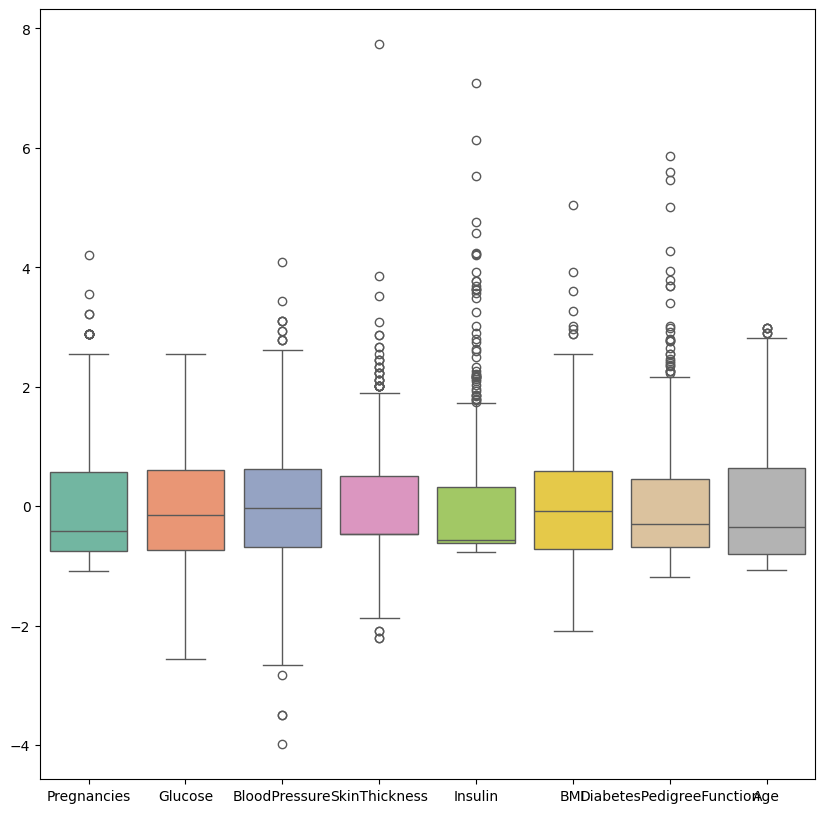

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=X_scaled, palette="Set2", ax=ax)

In [44]:
X_scaled.reset_index(drop=True,inplace=True)
y_outlier_detection.reset_index(drop=True,inplace=True)

In [61]:
q = X_scaled["BloodPressure"].quantile(0.95)
newdata = X_scaled[X_scaled["BloodPressure"]<q]

In [45]:
newdata = X_scaled.copy()  # Start with a copy of the original DataFrame

for column in X_scaled.columns:
    q = X_scaled[column].quantile(0.95)  # Calculate the 95th percentile for the column
    newdata = newdata[newdata[column] < q]  # Filter the DataFrame based on the condition

# `newdata` will contain only the rows where all columns have values below their respective 95th percentiles.
y_new = y_outlier_detection.loc[newdata.index]  # Get the corresponding target values for the filtered rows


In [46]:
newdata.shape

(512, 8)

In [47]:
y_new.shape

(512,)

<Axes: >

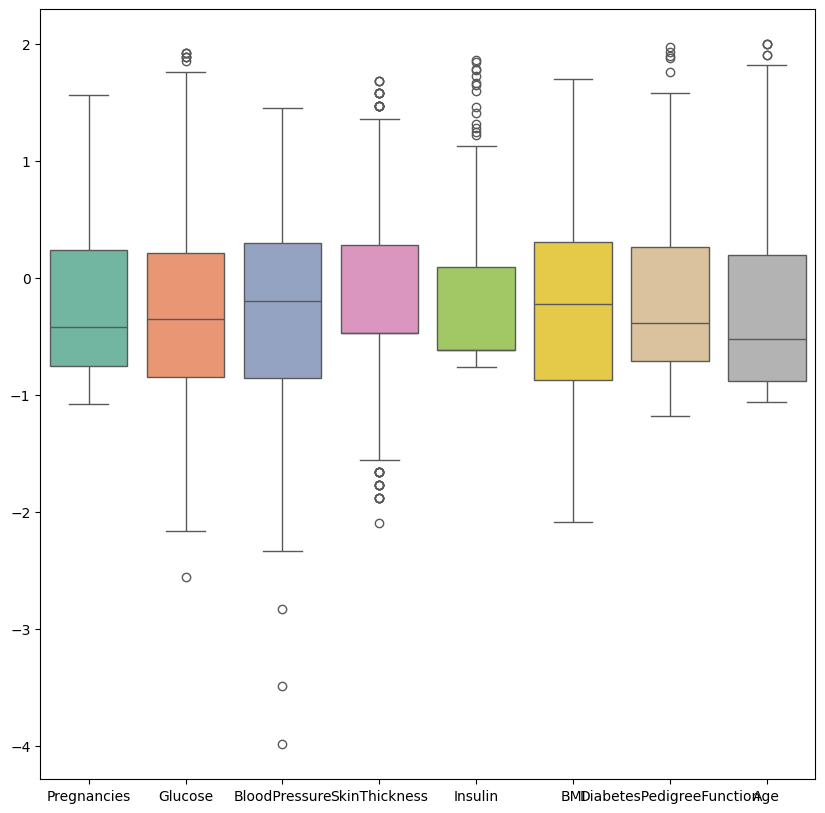

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=newdata, palette="Set2", ax=ax)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(newdata,y_new,test_size=0.2,random_state=42)

In [50]:
X_train.shape

(409, 8)

DATA IMBALANCE --> OVERSAMPLING(taking minority class and increasing it) AND UNDERSAMPLING(majority class and decrease)

SMOTE(synthetic data and increase the number of samples to majority class)

In [51]:
y_train.value_counts()

,count
Outcome,
0,304
1,105


In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [53]:
y_train_smote.value_counts()

,count
Outcome,
0,304
1,304


In [54]:
from sklearn.linear_model import LogisticRegression
classification  = LogisticRegression()
classification.fit(X_train_smote,y_train_smote)

LogisticRegression()

MODEL PREDICTIONS

In [55]:
y_prediction = classification.predict(X_test)

MODEL EVALUATION

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_prediction))

0.7378640776699029


In [57]:
target_names = ['Non - Diabetic','Diabetic']
print(classification_report(y_test,y_prediction,target_names=target_names))

                precision    recall  f1-score   support

Non - Diabetic       0.88      0.72      0.79        72
      Diabetic       0.55      0.77      0.64        31

      accuracy                           0.74       103
     macro avg       0.71      0.75      0.72       103
  weighted avg       0.78      0.74      0.75       103



RECALL IS IMPORTANT METRIC IN MEDICAL DOMAIN

In [58]:
import pickle
pickle.dump(classification,open('logistic_model.pkl','wb'))
